<a href="https://colab.research.google.com/github/phurisk/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

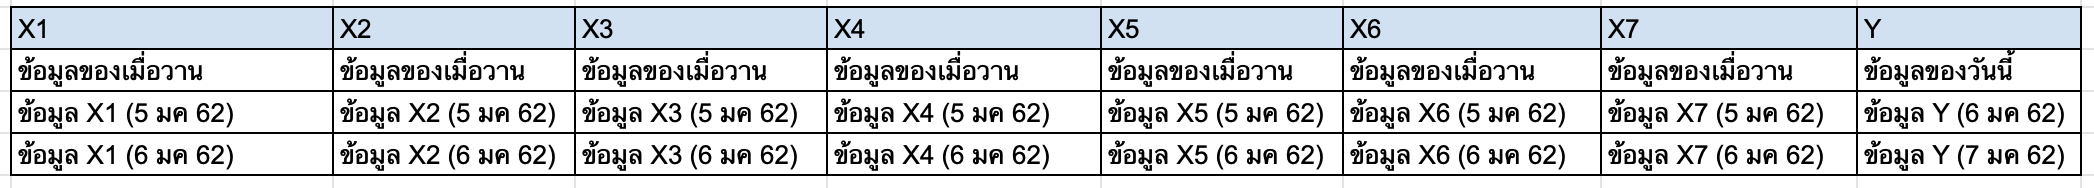

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# X1 ความกด(เปอร์เซ็นต์)


## จัดข้อมูล เพื่อนำไปทำ Function
- เนื่องจากข้อมูลมี Format เดียวกันการทำ Function จะได้ง่ายต่อการเตรียมข้อมูลเริ่มต้น เพราะเป็นการทำงานที่ซ้ำๆ

In [3]:
import os
import pandas as p
import numpy as npd

In [4]:
file_path = "/content/drive/Shareddrives/Utu/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx"

In [5]:
df = pd.read_excel(file_path)

################################################################################

- 1 เป็นการเลือกตั้งแต่ row ที่5 ลงมา และเลือกตั้งแต่ column ที่ 3 จนถึงก่อนสุดท้าย 1 column

In [6]:
df = df.iloc[4:, 2:34]

- 2 ทำการแปลงคอลัมน์ที่มีข้อมูลวันที่-เวลา ที่มีให้อยู่ในรูปแบบของ Pandas DateTime

In [7]:
df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0])

- 3 แปลงข้อมูล Pandas DateTime ให้อยู่ในรูป ปี/เดือน

In [8]:
df.iloc[:, 0] = df.iloc[:, 0].dt.to_period('M')

- 4 setให้คอลัมน์ที่ 0 ใน DataFrame กลายเป็น index ของ DataFrame

In [9]:
df.set_index(df.columns[0], inplace=True)

In [10]:
df

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
Unnamed: 2,,,,,,,,,,,,,,,,,,,,,
2011-10,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,1010.14,1010.60,...,1010.90,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52
2011-11,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,1009.68,1011.96,...,1013.63,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-
2011-12,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,1014.29,1016.10,...,1012.88,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4
2012-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,1016.98,1016.18,...,1009.62,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52
2012-02,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,1011.25,1011.42,...,1006.99,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-
2012-10,1011.5,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,1010.07,1010.56,1011.39,...,1011.87,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83
2012-11,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,1008.36,1008.55,1009.21,...,1008.60,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-
2012-12,1009.8,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,1011.34,1010.76,1010.29,...,1010.88,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86
2013-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,1011.64,1010.92,1012.06,...,1013.70,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58


In [11]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace('-', np.nan), errors='coerce')
        mean_value = numeric_values.mean()
        row[row == '-'] = f'{mean_value:.2f}'
    return row

df = df.apply(replace_dash_with_mean, axis=1)


In [12]:
df

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
Unnamed: 2,,,,,,,,,,,,,,,,,,,,,
2011-10,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,1010.14,1010.60,...,1010.90,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52
2011-11,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,1009.68,1011.96,...,1013.63,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.72
2011-12,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,1014.29,1016.10,...,1012.88,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4
2012-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,1016.98,1016.18,...,1009.62,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52
2012-02,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,1011.25,1011.42,...,1006.99,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.75
2012-10,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,1010.07,1010.56,1011.39,...,1011.87,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83
2012-11,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,1008.36,1008.55,1009.21,...,1008.60,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,1010.46
2012-12,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,1011.34,1010.76,1010.29,...,1010.88,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86
2013-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,1011.64,1010.92,1012.06,...,1013.70,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58


- 5 กำหนดชื่อคอลัมน์ โดยให้ลำดับของตัวเลขที่เริ่มต้นที่ 1 และสิ้นสุดที่จำนวนคอลัมน์ของ DataFrame

In [13]:
df.columns = range(1, df.shape[1] + 1)

- 6 ทำการ stack คอลัมน์ ของ DataFrame และเปลี่ยนชื่อคอลัมน์ของ DataFrame แถวที่ถูก stack จะถูกเปลี่ยนชื่อเป็น 'day' และคอลัมน์ที่มีค่าในแนวนอนจะถูกเปลี่ยนชื่อเป็น 'value'

In [14]:
df_long = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'value'})

In [15]:
df_long

,Unnamed: 2,day,value
0,2011-10,1,1005.47
1,2011-10,2,1006.65
2,2011-10,3,1007.49
3,2011-10,4,1008.28
4,2011-10,5,1009.88
...,...,...,...
1700,2022-02,27,1014.37
1701,2022-02,28,1013.04
1702,2022-02,29,1013.37
1703,2022-02,30,1013.98


- 7 เปลี่ยนชื่อคอลัมน์ที่อยู่ที่ตำแหน่งที่ 0 (คอลัมน์แรก) เป็น 'year/month'

In [16]:
df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)

In [17]:
df_long

,year/month,day,value
0,2011-10,1,1005.47
1,2011-10,2,1006.65
2,2011-10,3,1007.49
3,2011-10,4,1008.28
4,2011-10,5,1009.88
...,...,...,...
1700,2022-02,27,1014.37
1701,2022-02,28,1013.04
1702,2022-02,29,1013.37
1703,2022-02,30,1013.98


##############################################################
##############################################################

In [18]:
file_path = "/content/drive/Shareddrives/Utu/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx"

In [19]:
df = pd.read_excel(file_path)

- 1 เป็นการเลือกตั้งแต่ row ที่5 ลงมา และเลือกตั้งแต่ column ที่ 3 จนถึงก่อนสุดท้าย 1 column

In [20]:
df = df.iloc[4:, 2:34]

In [21]:
df

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
4,2011-10-01 00:00:00,21.6,111.4,0.4,0,0,3.4,1.8,0.6,0.4,...,0,0,0,0,0,0,0.2,0,0,0
5,2011-11-01 00:00:00,0,0,0,0,0,0,0,0,6.8,...,0,0,0,0,0,0,0.6,0,0,-
6,2011-12-01 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2012-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,T,0
8,2012-02-01 00:00:00,0,0.2,1.2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,-,-
9,2012-10-01 00:00:00,0,0,0.6,2,4.8,0,4.6,0.6,0.4,...,0,0,0,0,0,0,0,0,2,0
10,2012-11-01 00:00:00,0,0,0,1,0,0,0,0,0,...,0,0.2,2.3,4.1,0.2,4.8,1.9,0,0,-
11,2012-12-01 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,2013-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.8,1,0,0,7.2
13,2013-02-01 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 2 ทำการแปลงคอลัมน์ที่มีข้อมูลวันที่-เวลา ที่มีให้อยู่ในรูปแบบของ Pandas DateTime

In [22]:
df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0])

- 3 แปลงข้อมูล Pandas DateTime ให้อยู่ในรูป ปี/เดือน

In [23]:
df.iloc[:, 0] = df.iloc[:, 0].dt.to_period('M')

- 4 setให้คอลัมน์ที่ 0 ใน DataFrame กลายเป็น index ของ DataFrame

In [24]:
df.set_index(df.columns[0], inplace=True)

In [25]:
df

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
Unnamed: 2,,,,,,,,,,,,,,,,,,,,,
2011-10,21.6,111.4,0.4,0,0,3.4,1.8,0.6,0.4,0,...,0,0,0,0,0,0,0.2,0,0,0
2011-11,0,0,0,0,0,0,0,0,6.8,0,...,0,0,0,0,0,0,0.6,0,0,-
2011-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,T,0
2012-02,0,0.2,1.2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,-,-
2012-10,0,0,0.6,2,4.8,0,4.6,0.6,0.4,0,...,0,0,0,0,0,0,0,0,2,0
2012-11,0,0,0,1,0,0,0,0,0,0.3,...,0,0.2,2.3,4.1,0.2,4.8,1.9,0,0,-
2012-12,0,0,0,0,0,0,0,0,0,3.4,...,0,0,0,0,0,0,0,0,0,0
2013-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.8,1,0,0,7.2


In [26]:
import pandas as pd
import numpy as np

def replace_dash_and_nan_with_mean(row):
    # Replace "T" with 0.001, "nan" with np.nan, and dashes with np.nan
    cleaned_row = row.replace(['T', 'nan', '-'], [0.001, np.nan, np.nan])

    # Convert to numeric values
    numeric_values = pd.to_numeric(cleaned_row, errors='coerce')

    # Calculate the mean of numeric values, excluding NaNs
    mean_value = np.nanmean(numeric_values)

    # Replace dashes and NaN with the calculated mean
    row = row.replace(['T', 'nan', '-'], [f'{mean_value:.3f}', f'{mean_value:.3f}', f'{mean_value:.3f}'])
    return row

# Assuming df is your DataFrame
df = df.apply(replace_dash_and_nan_with_mean, axis=1)


<ipython-input-26-7532e2485d7e>:12: RuntimeWarning: Mean of empty slice
  mean_value = np.nanmean(numeric_values)


In [27]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
def replace_dash_and_nan_with_mean(row):
    numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]))
    mean_value = numeric_values.mean()
    row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
    return row

df = df.apply(replace_dash_and_nan_with_mean, axis=1)


ValueError: Unable to parse string "nan" at position 0

In [ ]:
df

- 5 กำหนดชื่อคอลัมน์ โดยให้ลำดับของตัวเลขที่เริ่มต้นที่ 1 และสิ้นสุดที่จำนวนคอลัมน์ของ DataFrame

In [ ]:
df.columns = range(1, df.shape[1] + 1)

- 6 ทำการ stack คอลัมน์ ของ DataFrame และเปลี่ยนชื่อคอลัมน์ของ DataFrame แถวที่ถูก stack จะถูกเปลี่ยนชื่อเป็น 'day' และคอลัมน์ที่มีค่าในแนวนอนจะถูกเปลี่ยนชื่อเป็น 'value'

In [ ]:
df_long = df.stack().reset_index().rename(columns={'level_1': 'day', 0: 'value'})

In [ ]:
df_long

- 7 เปลี่ยนชื่อคอลัมน์ที่อยู่ที่ตำแหน่งที่ 0 (คอลัมน์แรก) เป็น 'year/month'

In [ ]:
df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)

In [ ]:
df_long

In [ ]:
non_numeric_rows = df_long[pd.to_numeric(df_long['value'], errors='coerce').isna()]
non_numeric_rows


#################################################

### นำมาทำเป็น Fuction เพื่อจัดการข้อมูลทุกไฟล์(ทุกจังหวัด) ใน Folder ความกด(เปอร์เซ็นต์)
- โดย X1 คือ ความกด(เปอร์เซ็นต์)

---



In [29]:
import pandas as pd
import os
import numpy as np

X1_path = "/content/drive/Shareddrives/Utu/ความกด(เปอร์เซ็นต์)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกลนคร.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace('-', np.nan), errors='coerce')
        mean_value = numeric_values.mean()
        row[row == '-'] = f'{mean_value:.2f}'
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:-1].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X1'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Replace dash values with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X1_result = process_excel_files(X1_path)
# Display the dataframe
X1_result


,year/month,date,X1,province
0,2011-10,1,1005.47,จ.ขอนแก่น
1,2011-10,2,1006.65,จ.ขอนแก่น
2,2011-10,3,1007.49,จ.ขอนแก่น
3,2011-10,4,1008.28,จ.ขอนแก่น
4,2011-10,5,1009.88,จ.ขอนแก่น
...,...,...,...,...
8520,2022-02,27,1015.31,จ.หนองคาย
8521,2022-02,28,1013.06,จ.หนองคาย
8522,2022-02,29,29.00,จ.หนองคาย
8523,2022-02,30,30.00,จ.หนองคาย


- check ค่า null

In [31]:
# กรองแถวที่มีค่า null
null_values = X1_result[X1_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)


Empty DataFrame
Columns: [year/month, date, X1, province]
Index: []


# X2 ความชื้นสัมพัทธ์(เปอร์เซ็นต์)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder ความชื้นสัมพัทธ์(เปอร์เซ็นต์)
- โดย X2 คือ ความชื้นสัมพัทธ์(เปอร์เซ็นต์)

In [32]:
import pandas as pd
import os
import numpy as np

X2_path = "/content/drive/Shareddrives/Utu/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกลนคร.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace('-', np.nan), errors='coerce')
        mean_value = numeric_values.mean()
        row[row == '-'] = f'{mean_value:.2f}'
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X2'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Replace dash values with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X2_result = process_excel_files(X2_path)
# Display the dataframe
X2_result


,year/month,date,X2,province
0,2011-10,1,83,จ.ขอนแก่น
1,2011-10,2,92.0,จ.ขอนแก่น
2,2011-10,3,86.0,จ.ขอนแก่น
3,2011-10,4,80.0,จ.ขอนแก่น
4,2011-10,5,86.0,จ.ขอนแก่น
...,...,...,...,...
8520,2022-02,27,62.0,จ.หนองคาย
8521,2022-02,28,65.0,จ.หนองคาย
8522,2022-02,29,29.00,จ.หนองคาย
8523,2022-02,30,30.00,จ.หนองคาย


- check ค่า null

In [ ]:
# กรองแถวที่มีค่า null
null_values = X2_result[X2_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

# X3 ความเร็วลม(นอต)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder ความเร็วลม(นอต)
- โดย X3 คือ ความเร็วลม(นอต)

In [33]:
import pandas as pd
import os
import numpy as np

X3_path = "/content/drive/Shareddrives/Utu/ความเร็วลม(นอต)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกลนคร.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace('-', np.nan), errors='coerce')
        mean_value = numeric_values.mean()
        row[row == '-'] = f'{mean_value:.2f}'
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X3'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Replace dash values with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X3_result = process_excel_files(X3_path)
# Display the dataframe
X3_result


,year/month,date,X3,province
0,2011-10,1,3,จ.ขอนแก่น
1,2011-10,2,2.0,จ.ขอนแก่น
2,2011-10,3,3,จ.ขอนแก่น
3,2011-10,4,2.0,จ.ขอนแก่น
4,2011-10,5,2.0,จ.ขอนแก่น
...,...,...,...,...
8520,2022-02,27,2.0,จ.หนองคาย
8521,2022-02,28,2.0,จ.หนองคาย
8522,2022-02,29,29.00,จ.หนองคาย
8523,2022-02,30,30.00,จ.หนองคาย


- check ค่า null

In [34]:
# กรองแถวที่มีค่า null
null_values = X3_result[X3_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

Empty DataFrame
Columns: [year/month, date, X3, province]
Index: []


# X4 จำนวนเมฆ(10ส่วน)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder จำนวนเมฆ(10ส่วน)
- โดย X4 คือ จำนวนเมฆ(10ส่วน)

In [35]:
import pandas as pd
import os
import numpy as np

X4_path = "/content/drive/Shareddrives/Utu/จำนวนเมฆ(10ส่วน)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกลนคร.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace(['-', np.nan], [np.nan, np.nan]), errors='coerce')
        mean_value = numeric_values.mean()
        row = row.replace(['-', np.nan], [f'{mean_value:.2f}', f'{mean_value:.2f}'])
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5

            # Replace dash values with the mean in each row
            df = df.apply(replace_dash_with_mean, axis=1)  # Apply after setting the index

            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X4'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X4_result = process_excel_files(X4_path)
# Display the dataframe
X4_result


,year/month,date,X4,province
0,2011-10,1,9,จ.ขอนแก่น
1,2011-10,2,10.0,จ.ขอนแก่น
2,2011-10,3,10,จ.ขอนแก่น
3,2011-10,4,8.0,จ.ขอนแก่น
4,2011-10,5,10.0,จ.ขอนแก่น
...,...,...,...,...
8520,2022-02,27,3,จ.หนองคาย
8521,2022-02,28,2,จ.หนองคาย
8522,2022-02,29,1,จ.หนองคาย
8523,2022-02,30,1,จ.หนองคาย


- check ค่า null

In [36]:
duplicate_rows = X4_result[X4_result.duplicated()]
duplicate_rows

,year/month,date,X4,province


In [37]:
non_numeric_rows = X4_result[pd.to_numeric(X4_result['X4'], errors='coerce').isna()]
non_numeric_rows

,year/month,date,X4,province


In [ ]:
# กรองแถวที่มีค่า null
null_values = X4_result[X4_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

# X5 อุณหภูมิจุดน้ำค้าง(เซลเซียส)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder อุณหภูมิจุดน้ำค้าง(เซลเซียส)
- โดย X5 คือ อุณหภูมิจุดน้ำค้าง(เซลเซียส)

In [127]:
import pandas as pd
import os
import numpy as np

X5_path = "/content/drive/Shareddrives/Utu/อุณหภูมิจุดน้ำค้าง(เซลเซียส)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกล.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace('-', np.nan), errors='coerce')
        mean_value = numeric_values.mean()
        row[row == '-'] = f'{mean_value:.2f}'
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X5'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Replace dash values with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X5_result = process_excel_files(X5_path)
# Display the dataframe
X5_result


,year/month,date,X5,province
0,2011-10,1,24.2,จ.ขอนแก่น
1,2011-10,2,24.0,จ.ขอนแก่น
2,2011-10,3,22.9,จ.ขอนแก่น
3,2011-10,4,21.9,จ.ขอนแก่น
4,2011-10,5,21.7,จ.ขอนแก่น
...,...,...,...,...
8364,2022-02,27,15.8,จ.หนองคาย
8365,2022-02,28,17.8,จ.หนองคาย
8366,2022-02,29,16.6,จ.หนองคาย
8367,2022-02,30,14.9,จ.หนองคาย


In [66]:
has_nan_values = X5_result['X5'].isna().any()
print(has_nan_values)

False


- check ค่า null

In [67]:
non_numeric_rows = X5_result[pd.to_numeric(X5_result['X5'], errors='coerce').isna()]
print(non_numeric_rows)

Empty DataFrame
Columns: [year/month, date, X5, province]
Index: []


In [68]:
# กรองแถวที่มีค่า null
null_values = X5_result[X5_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

Empty DataFrame
Columns: [year/month, date, X5, province]
Index: []


# X6 อุณหภูมิต่ำสุด(เซลเซียส)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder อุณหภูมิต่ำสุด(เซลเซียส)
- โดย X7 คือ อุณหภูมิต่ำสุด(เซลเซียส)

In [69]:
import pandas as pd
import os

X6_path = "/content/drive/Shareddrives/Utu/อุณหภูมิตุ้มแห้ง(เซลเซียส)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกล.xlsx",
    "จ.หนองคาย.xlsx",
]

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()
            df.set_index(df.columns[0], inplace=True)
            df.columns = range(1, df.shape[1] + 1)
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X6'})
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)

            # เพิ่มคอลัมน์ 'province' และใส่ชื่อจังหวัดลงไป
            province_name = os.path.splitext(filename)[0]  # ดึงชื่อไฟล์โดยไม่รวมนามสกุล
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X6_result = process_excel_files(X6_path)
# แสดง dataframe
X6_result


,year/month,date,X6,province
0,2011-10,1,27.6,จ.ขอนแก่น
1,2011-10,2,25.6,จ.ขอนแก่น
2,2011-10,3,25.6,จ.ขอนแก่น
3,2011-10,4,25.8,จ.ขอนแก่น
4,2011-10,5,24.3,จ.ขอนแก่น
...,...,...,...,...
8365,2022-02,27,23.8,จ.หนองคาย
8366,2022-02,28,25.4,จ.หนองคาย
8367,2022-02,29,-,จ.หนองคาย
8368,2022-02,30,-,จ.หนองคาย


In [70]:
import pandas as pd
import os
import numpy as np

X6_path = "/content/drive/Shareddrives/Utu/อุณหภูมิต่ำสุด(เซลเซียส)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกล.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace('-', np.nan), errors='coerce')
        mean_value = numeric_values.mean()
        row[row == '-'] = f'{mean_value:.2f}'
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X6'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Replace dash values with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X6_result = process_excel_files(X6_path)
# Display the dataframe
X6_result


,year/month,date,X7,province
0,2011-10,1,24.8,จ.ขอนแก่น
1,2011-10,2,23.0,จ.ขอนแก่น
2,2011-10,3,22.1,จ.ขอนแก่น
3,2011-10,4,22.8,จ.ขอนแก่น
4,2011-10,5,23.1,จ.ขอนแก่น
...,...,...,...,...
8520,2022-02,27,17.5,จ.หนองคาย
8521,2022-02,28,19,จ.หนองคาย
8522,2022-02,29,29.00,จ.หนองคาย
8523,2022-02,30,30.00,จ.หนองคาย


- check ค่า null

In [ ]:
non_numeric_rows = X6_result[pd.to_numeric(X6_result['X6'], errors='coerce').isna()]
non_numeric_rows

In [ ]:
# กรองแถวที่มีค่า null
null_values = X6_result[X6_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

# X7 อุณหภูมิตุ้มแห้ง(เซลเซียส)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder อุณหภูมิตุ้มแห้ง(เซลเซียส)
- โดย X7 คือ อุณหภูมิตุ้มแห้ง(เซลเซียส)

In [72]:
import pandas as pd
import os
import numpy as np

X7_path = "/content/drive/Shareddrives/Utu/อุณหภูมิตุ้มแห้ง(เซลเซียส)"

file_order = [
    "จ.ขอนแก่น.xlsx",
    "จ.นครพนม.xlsx",
    "จ.เลย.xlsx",
    "จ.สกล.xlsx",
    "จ.หนองคาย.xlsx",
]

def replace_dash_with_mean(row):
    if '-' in row.values:
        numeric_values = pd.to_numeric(row.replace('-', np.nan), errors='coerce')
        mean_value = numeric_values.mean()
        row[row == '-'] = f'{mean_value:.2f}'
    return row

def process_excel_files(Phuris):
    processed_dfs = []

    for filename in file_order:
        file_path = os.path.join(Phuris, filename)

        if os.path.exists(file_path) and filename.endswith(".xlsx"):
            df = pd.read_excel(file_path)
            df = df.iloc[4:, 2:34].copy()    #1
            df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).copy()   #2
            df[df.columns[0]] = df[df.columns[0]].dt.to_period('M').copy()   #3
            df.set_index(df.columns[0], inplace=True)  #4
            df.columns = range(1, df.shape[1] + 1)    #5
            df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X7'})    #6
            df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)    #7

            # Replace dash values with the mean in each row
            df_long = df_long.apply(replace_dash_with_mean, axis=1)

            # Add 'province' column and fill it with the province name
            province_name = os.path.splitext(filename)[0]
            df_long['province'] = province_name

            processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    return final_df

X7_result = process_excel_files(X7_path)
# Display the dataframe
X7_result


,year/month,date,X7,province
0,2011-10,1,27.6,จ.ขอนแก่น
1,2011-10,2,25.6,จ.ขอนแก่น
2,2011-10,3,25.6,จ.ขอนแก่น
3,2011-10,4,25.8,จ.ขอนแก่น
4,2011-10,5,24.3,จ.ขอนแก่น
...,...,...,...,...
8365,2022-02,27,23.8,จ.หนองคาย
8366,2022-02,28,25.4,จ.หนองคาย
8367,2022-02,29,29.00,จ.หนองคาย
8368,2022-02,30,30.00,จ.หนองคาย


- check ค่า null

In [73]:
non_numeric_rows = X7_result[pd.to_numeric(X7_result['X7'], errors='coerce').isna()]
non_numeric_rows

,year/month,date,X7,province


In [74]:
# กรองแถวที่มีค่า null
null_values = X7_result[X7_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

Empty DataFrame
Columns: [year/month, date, X7, province]
Index: []


# X8 ปริมาณฝน(มิลลิเมตร)

- เนื่องจาก format ของข้อมูลเหมือนกัน จึงใช้ Fuctionเดิม เพื่อจัดการข้อมูลทุกไฟล์ใน Folder ปริมาณฝน(มิลลิเมตร)
- โดย X8 คือ ปริมาณฝน(มิลลิเมตร)

In [122]:
import pandas as pd
import numpy as np
import os

X8_path = "/content/drive/Shareddrives/Utu/ปริมาณฝน(มิลลิเมตร)"

def replace_dash_and_nan_with_mean(row):
    numeric_values = pd.to_numeric(row.replace(['-', 'T', np.nan], [np.nan, 0.001, np.nan]), errors='coerce')
    mean_value = numeric_values.mean()
    row = row.replace(['-', 'T', np.nan], [f'{mean_value:.3f}', f'{mean_value:.3f}', f'{mean_value:.3f}'])
    return row

def process_rainfall_data(X8_path):
    processed_dfs = []

    # List all Excel files in the specified folder
    file_order = [file for file in os.listdir(X8_path) if file.endswith(".xlsx")]

    for filename in file_order:
        file_path = os.path.join(X8_path, filename)

        # Read the Excel file
        df = pd.read_excel(file_path)

        # 1. Select rows from 5 onwards and columns from 3 to the second-to-last column
        df = df.iloc[4:, 2:34]

        # 2. Convert the first column to Pandas DateTime
        df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0])

        # 3. Convert Pandas DateTime to year/month format
        df.iloc[:, 0] = df.iloc[:, 0].dt.to_period('M')

        # 4. Set the first column as the index
        df.set_index(df.columns[0], inplace=True)

        # 5. Replace dashes and NaN values with the mean in each row
        df = df.apply(replace_dash_and_nan_with_mean, axis=1)

        # 6. Rename columns with numeric sequences
        df.columns = range(1, df.shape[1] + 1)

        # 7. Stack the DataFrame and rename columns
        df_long = df.stack().reset_index().rename(columns={'level_1': 'date', 0: 'X8'})

        # 8. Rename the first column to 'year/month'
        df_long.rename(columns={df_long.columns[0]: 'year/month'}, inplace=True)

        # Add 'province' column and fill it with the province name
        province_name = os.path.splitext(filename)[0]
        df_long['province'] = province_name

        processed_dfs.append(df_long)

    final_df = pd.concat(processed_dfs, ignore_index=True)

    # Replace dash in 'X8' column with the mean of each row
    final_df['X8'] = final_df.apply(replace_dash_and_nan_with_mean, axis=1)['X8']

    return final_df

X8_result = process_rainfall_data(X8_path)
X8_result

,year/month,date,X8,province
0,2011-10,1,48.6,จ.หนองคาย
1,2011-10,2,59,จ.หนองคาย
2,2011-10,3,0,จ.หนองคาย
3,2011-10,4,1,จ.หนองคาย
4,2011-10,5,19.1,จ.หนองคาย
...,...,...,...,...
8520,2022-02,27,0,จ.นครพนม
8521,2022-02,28,0,จ.นครพนม
8522,2022-02,29,0.775,จ.นครพนม
8523,2022-02,30,0.775,จ.นครพนม


- check ค่า null

 เกิดค่า nan เพราะมี row ที่เป็น "-" ทั้งแถว ดั้งนั้นจัดการโดยการแทนค่า nan ใน X8 ด้วย 0

In [123]:
non_numeric_rows = X8_result[pd.to_numeric(X8_result['X8'], errors='coerce').isna()]
non_numeric_rows


,year/month,date,X8,province
744,2016-02,1,nan,จ.หนองคาย
745,2016-02,2,nan,จ.หนองคาย
746,2016-02,3,nan,จ.หนองคาย
747,2016-02,4,nan,จ.หนองคาย
748,2016-02,5,nan,จ.หนองคาย
...,...,...,...,...
5885,2016-02,27,nan,จ.ขอนแก่น
5886,2016-02,28,nan,จ.ขอนแก่น
5887,2016-02,29,nan,จ.ขอนแก่น
5888,2016-02,30,nan,จ.ขอนแก่น


In [124]:
# แปลงค่าในคอลัมน์ 'X8' เป็นตัวเลข และให้ค่าที่ไม่สามารถแปลงได้เป็น NaN
X8_result['X8'] = pd.to_numeric(X8_result['X8'], errors='coerce')

# แทนที่ค่า NaN ด้วย "0"
X8_result['X8'] = X8_result['X8'].fillna("0")

# ตรวจสอบอีกครั้งหลังจากการแทนที่
non_numeric_rows = X8_result[pd.to_numeric(X8_result['X8'], errors='coerce').isna()]
non_numeric_rows


,year/month,date,X8,province


In [125]:
# กรองแถวที่มีค่า null
null_values = X8_result[X8_result.isnull().any(axis=1)]

# แสดงผลลัพธ์
print(null_values)

Empty DataFrame
Columns: [year/month, date, X8, province]
Index: []


# รวมตาราง

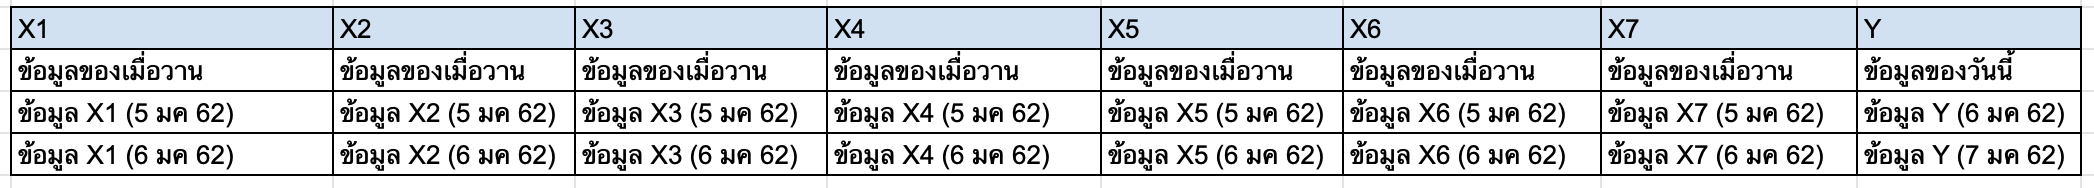

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)

ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

In [ ]:
X1_result.head(3) , X2_result.head(3) , X3_result.head(3) , X4_result.head(3) , X5_result.head(3) , X6_result.head(3) , X7_result.head(3)  , X8_result.head(3)

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrames X1 to X8 for each province (5 provinces)
# Replace this with your actual data
provinces = ['จ.ขอนแก่น', 'จ.หนองคาย', 'จ.นครพนม', 'จ.เลย', 'จ.สกลนคร']

# Generate sample data for each province
dfs = []
for province in provinces:
    df_province = pd.DataFrame({
        'year/month': ['2011-10', '2011-10', '2011-10'],
        'date': [1, 2, 3],
        'province': [province] * 3,  # Repeat the province name
        'X1': np.random.rand(3) * 1000,  # Replace with your actual data
        'X2': np.random.rand(3) * 100,
        'X3': np.random.rand(3) * 10,
        'X4': np.random.rand(3) * 20,
        'X5': np.random.rand(3) * 30,
        'X6': np.random.rand(3) * 40,
        'X7': np.random.rand(3) * 50,
        'X8': np.random.rand(3) * 60,
    })
    dfs.append(df_province)

# Merge DataFrames on 'year/month', 'date', and 'province'
merged_df = pd.concat(dfs, ignore_index=True)

# Generate example 'Y' values (rainfall for the next day D+1)
# Replace this with your actual 'Y' values
np.random.seed(42)  # Setting seed for reproducibility
merged_df['Y'] = np.random.randint(0, 30, size=len(merged_df))

# Reshape the DataFrame to have 40 columns for Xi and 1 column for Y
reshaped_df = merged_df.set_index(['year/month', 'date', 'province']).unstack().reset_index()

# Flatten the multi-level column index
reshaped_df.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in reshaped_df.columns]

# Display the reshaped DataFrame
reshaped_df


In [ ]:
# List of DataFrames
dfs_list = [X1_result, X2_result, X3_result, X4_result, X5_result, X6_result, X7_result, X8_result]

# Merge DataFrames on 'year/month', 'date', and 'province'
merged_df = pd.concat(dfs_list, axis=1)

# Display the merged DataFrame
merged_df

In [ ]:
import pandas as pd


key_columns = ['year/month', 'date', 'province']


X1_selected = X1_result[key_columns + ['X1']]
X2_selected = X2_result[key_columns + ['X2']]
X3_selected = X3_result[key_columns + ['X3']]
X4_selected = X4_result[key_columns + ['X4']]
X5_selected = X5_result[key_columns + ['X5']]
X6_selected = X6_result[key_columns + ['X6']]
X7_selected = X7_result[key_columns + ['X7']]
Y_selected = X8_result[key_columns + ['X8']]


merged_df = pd.merge(X1_selected, X2_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, X3_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, X4_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, X5_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, X6_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, X7_selected, on=key_columns, how='outer')
merged_df = pd.merge(merged_df, Y_selected, on=key_columns, how='outer')

# เปลี่ยนชื่อ column
column_mapping = {'X1': 'X1', 'X2': 'X2', 'X3': 'X3', 'X4': 'X4', 'X5': 'X5', 'X6': 'X6', 'X7': 'X7', 'X8': 'X8'}
merged_df.rename(columns=column_mapping, inplace=True)

merged_df


In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrames X1 to X8 for each province (5 provinces)
# Replace this with your actual data
provinces = ['จ.ขอนแก่น', 'จ.หนองคาย', 'จ.นครพนม', 'จ.เลย', 'จ.สกลนคร']

# Generate sample data for each province
dfs = []
for province in provinces:
    df_province = pd.DataFrame({
        'year/month': ['2011-10', '2011-10', '2011-10'],
        'date': [1, 2, 3],
        'province': [province] * 3,  # Repeat the province name
        'X1': np.random.rand(3) * 1000,  # Replace with your actual data
        'X2': np.random.rand(3) * 100,
        'X3': np.random.rand(3) * 10,
        'X4': np.random.rand(3) * 20,
        'X5': np.random.rand(3) * 30,
        'X6': np.random.rand(3) * 40,
        'X7': np.random.rand(3) * 50,
        'X8': np.random.rand(3) * 60,
    })
    dfs.append(df_province)

# Merge DataFrames on 'year/month', 'date', and 'province'
merged_df = pd.concat(dfs, ignore_index=True)

# Generate example 'Y' values (rainfall for the next day D+1)
# Replace this with your actual 'Y' values
np.random.seed(42)  # Setting seed for reproducibility
merged_df['Y'] = np.random.randint(0, 30, size=len(merged_df))

# Reshape the DataFrame to have 40 columns for Xi and 1 column for Y
reshaped_df = merged_df.set_index(['year/month', 'date', 'province']).unstack().reset_index()

# Flatten the multi-level column index
reshaped_df.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in reshaped_df.columns]

# Display the reshaped DataFrame
reshaped_df
